Testowanie ngen = 20
gen	nevals	avg   	std	min   	max   
0  	100   	-11425	0  	-11425	-11425
1  	80    	-8816.14	4206.13	-11605	-267  
2  	86    	-4122.08	4404.85	-11665	-292.5
3  	83    	-1663.7 	2853.7 	-12035	-213  
4  	89    	-720.214	1184.47	-11670	-293  
5  	82    	-530.052	282.038	-2116 	-239.143
6  	82    	-493.639	261.568	-2297.5	-220.333
7  	84    	-576.583	532.413	-3672.57	-144.375
8  	77    	-460.771	225.586	-1201   	-178.9  
9  	86    	-553.996	1143.99	-11720  	-161    
10 	87    	-416.886	191.314	-1153   	-159.333
11 	93    	-405.793	249.895	-1929.57	-63.75  
12 	78    	-386.592	242.628	-1788.08	-63.75  
13 	86    	-391.342	218.002	-1332.57	-63.75  
14 	83    	-364.156	214.628	-1252.25	-49.9231
15 	92    	-395.269	309.922	-1899.45	-30.75  
16 	90    	-324.022	205.321	-1150.25	-46.2727
17 	89    	-339.328	260.17 	-1187.67	-44.6364
18 	86    	-298.211	235.061	-1076.2 	-6.84615
19 	86    	-291.776	227.814	-1254.38	-6.84615
20 	90    	-226.948	185.585	-1152.36	-21     
gen	ne

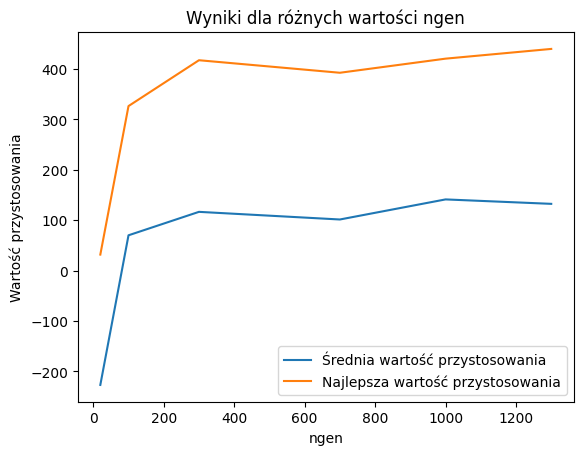

Testowanie cxpb = 0.1
gen	nevals	avg   	std	min   	max   
0  	100   	-11425	0  	-11425	-11425
1  	53    	-8725.05	4179.48	-11745	-242  
2  	56    	-4915.01	4567.45	-12050	-322  
3  	56    	-1328.08	1872.79	-12200	-301.6
4  	53    	-505.996	317.753	-3185 	-269  
5  	43    	-448.386	204.62 	-1990.75	-240.857
6  	52    	-454.094	282.345	-2058   	-233.375
7  	57    	-406.372	168.582	-1130.5 	-151.875
8  	54    	-372.672	158.519	-1191   	-198.4  
9  	50    	-362.356	212.379	-2025.33	-198.4  
10 	50    	-314.833	92.222 	-669.6  	-167.286
11 	59    	-327.603	150.3  	-1235.1 	-167.286
12 	63    	-333.746	158.369	-931.143	-167.286
13 	47    	-299.8  	144.743	-1068   	-167.286
14 	55    	-295.934	172.795	-1395.75	-145.333
15 	58    	-282.476	179.332	-1264.75	-103.333
16 	58    	-324.909	278.326	-1878.25	-50.6364
17 	52    	-267.505	148.92 	-754.333	-50.6364
18 	50    	-241.394	160.452	-996    	-29.4286
19 	56    	-251.197	171.457	-792.375	-29.4286
20 	55    	-234.764	169.005	-1177.57	-4.28571
21

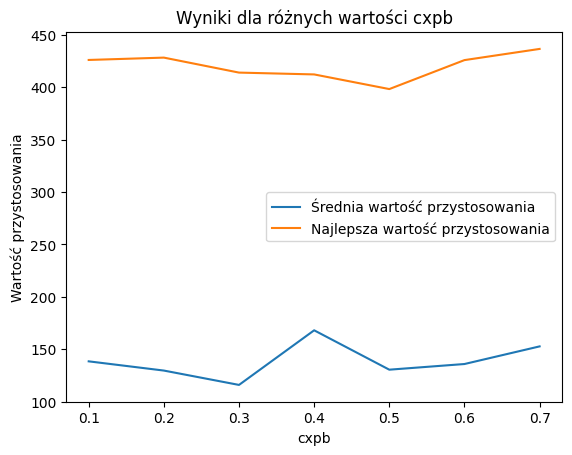

Testowanie mutpb = 0.05
gen	nevals	avg   	std	min   	max   
0  	100   	-11425	0  	-11425	-11425
1  	71    	-11075.1	1772.72	-11555	-491  
2  	67    	-10191.1	3136.91	-11525	-428  
3  	72    	-7519.44	4497.95	-11580	-340  
4  	75    	-4391.46	4048.42	-11615	-340  
5  	73    	-1939.83	2698.86	-11590	-302  
6  	77    	-913.049	1343.44	-11525	-276  
7  	80    	-943.798	1706.96	-11630	-280.5
8  	74    	-725.713	1249.6 	-11555	-276  
9  	66    	-728.445	1643.85	-11620	-268  
10 	78    	-679.559	1284.21	-11480	-267  
11 	77    	-740.894	1674.94	-11530	-241  
12 	70    	-493.762	581.482	-3206 	-203  
13 	85    	-544.626	1247.42	-11555	-215  
14 	69    	-392.782	453.857	-3209 	-175  
15 	79    	-650.471	887.894	-3294.5	-175  
16 	68    	-524.771	823.146	-4903.5	-169.5
17 	75    	-398.832	511.99 	-3267.5	-169.5
18 	69    	-391.661	667.338	-4830.6	-169.5
19 	73    	-206.381	110.408	-1076  	-168  
20 	77    	-177.635	28.7923	-442   	-168  
21 	65    	-199.173	198.78 	-2096.5	-157.6
22 	70    	-171

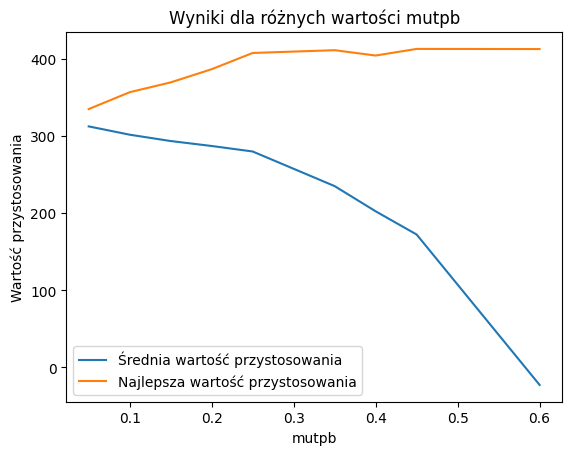

In [54]:
import random
import numpy as np
from deap import base, creator, tools, algorithms
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Definicje typów kontenerów
CORRIDOR, RESIDENTIAL, KITCHEN, SANITARY, COMMON = range(5)
CONTAINER_TYPES = [CORRIDOR, RESIDENTIAL, KITCHEN, SANITARY, COMMON]

# Wymiary siatki
GRID_WIDTH, GRID_HEIGHT = 10, 10

# Kolory i etykiety dla wizualizacji
colors = ['grey', 'blue', 'green', 'red', 'yellow']
labels = ['Korytarz', 'Mieszkalny', 'Kuchnia', 'Sanitariaty', 'Przestrzeń wspólna']
cmap = mcolors.ListedColormap(colors)


def fitnessFunction(individual):
    grid = np.array(individual).reshape(GRID_HEIGHT, GRID_WIDTH)

    # Liczba kontenerów różnego typu
    num_residential = np.sum(grid == RESIDENTIAL)
    num_kitchen = np.sum(grid == KITCHEN)
    num_common = np.sum(grid == COMMON)
    num_sanitary = np.sum(grid == SANITARY)

    # Oblicz średnią odległość od kontenerów mieszkalnych do innych typów kontenerów
    kitchen_distance, sanitary_distance, common_distance, = calculateAverageDistance(grid)

    # Optymalne proporcje
    ideal_residential_per_kitchen = 5
    ideal_residential_per_common = 10
    ideal_residential_per_sanitary = 3

    # Obliczenie kar za nieoptymalne proporcje
    kitchen_score = abs(num_residential - ideal_residential_per_kitchen * num_kitchen) * 5
    common_score = abs(num_residential - ideal_residential_per_common * num_common) * 5
    sanitary_score = abs(num_residential - ideal_residential_per_sanitary * num_sanitary) * 5

    # Ocena dostępności do korytarza
    accessibility_score = evaluateAccessibility(grid)

    residential_score = num_residential * (-20)

    corridor_score = isCorridorFullyConnectedScore(grid) * 25

    # Łączna ocena
    total_score = kitchen_score + common_score + sanitary_score + accessibility_score + \
                  kitchen_distance * 18 + sanitary_distance * 30 + common_distance * 9 + residential_score + corridor_score
    return total_score*(-1),


def calculateAverageDistance(grid):
    def average_distance(locations1, locations2):
        total_distance = 0
        num_pairs = 0
        ## Szukamy dystansu do najbliższego kontenera
        for loc1 in locations1:
            min_distance = 100
            for loc2 in locations2:
                distance = manhattanDistance(loc1, loc2)
                min_distance = min(min_distance, distance)
            total_distance += min_distance
            num_pairs += 1

        return total_distance / num_pairs if num_pairs > 0 else 200

    residential_locations = [(i, j) for i in range(GRID_HEIGHT) for j in range(GRID_WIDTH) if grid[i][j] == RESIDENTIAL]
    kitchen_locations = [(i, j) for i in range(GRID_HEIGHT) for j in range(GRID_WIDTH) if grid[i][j] == KITCHEN]
    sanitary_locations = [(i, j) for i in range(GRID_HEIGHT) for j in range(GRID_WIDTH) if grid[i][j] == SANITARY]
    common_locations = [(i, j) for i in range(GRID_HEIGHT) for j in range(GRID_WIDTH) if grid[i][j] == COMMON]

    kitchen_average_distance = average_distance(residential_locations, kitchen_locations)
    sanitary_average_distance = average_distance(residential_locations, sanitary_locations)
    common_average_distance = average_distance(residential_locations, common_locations)

    return kitchen_average_distance, sanitary_average_distance, common_average_distance


def runCorridor(grid, true_matrix, i ,j):
    true_matrix[i][j] = 1
    if (j + 1 < len(grid[i]) and grid[i][j + 1] == CORRIDOR and true_matrix[i][j+1] == 0):
        runCorridor(grid, true_matrix, i, j+1)

    if(i + 1 < len(grid) and grid[i + 1][j] == CORRIDOR and true_matrix[i+1][j] == 0):
        runCorridor(grid, true_matrix, i+1, j)

    if (j - 1 >= 0 and grid[i][j - 1] == CORRIDOR and true_matrix[i][j-1] == 0):
        runCorridor(grid, true_matrix, i, j-1)

    if (i - 1 >= 0 and grid[i - 1][j] == CORRIDOR and true_matrix[i-1][j] == 0):
        runCorridor(grid, true_matrix, i-1, j)


def isCorridorFullyConnectedScore(grid):
    number_of_corridors = 0
    true_matrix = np.zeros((GRID_WIDTH,GRID_HEIGHT))
    for i in range(GRID_WIDTH):
        for j in range(GRID_HEIGHT):
            if grid[i][j] == CORRIDOR and true_matrix[i][j] == 0:
                number_of_corridors += 1
                runCorridor(grid, true_matrix, i ,j)
            else:
                true_matrix[i][j] = 1

    return number_of_corridors

def manhattanDistance(loc1, loc2):
    return abs(loc1[0] - loc2[0]) + abs(loc1[1] - loc2[1])


def isDirectlyConnectedToCorridor(grid, i, j):
    # Sprawdza, czy dana komórka jest bezpośrednio połączona z korytarzem
    return (j + 1 < len(grid[i]) and grid[i][j + 1] == CORRIDOR) or (
            i + 1 < len(grid) and grid[i + 1][j] == CORRIDOR) or (
            j - 1 > 0 and grid[i][j - 1] == CORRIDOR) or (
            i - 1 > 0 and grid[i - 1][j] == CORRIDOR)


def isCorridorConnectedToCorridor(grid, i, j):
    # Sprawdza, czy dana komórka korytarza jest połączona z więcej niż jednym korytarzem lub jest na brzegu gridu
    numberOfNeighbourCorridors = (int(j + 1 < len(grid[i]) and grid[i][j + 1] == CORRIDOR) + int(
        i + 1 < len(grid) and grid[i + 1][j] == CORRIDOR) + int(
        j - 1 >= 0 and grid[i][j - 1] == CORRIDOR) + int(
        i - 1 >= 0 and grid[i - 1][j] == CORRIDOR))
    logic_value = (numberOfNeighbourCorridors > 1) or \
                  (((j + 1 > len(grid[i])) or (j - 1 < 0) or (i + 1 > len(grid)) or (i - 1 < 0))
                   and numberOfNeighbourCorridors > 0)
    return logic_value


def evaluateAccessibility(grid):
    accessibility_score = 0

    # Sprawdzenie, czy każdy kontener jest połączony z korytarzem
    for i in range(GRID_HEIGHT):
        for j in range(GRID_WIDTH):
            if grid[i][j] in [RESIDENTIAL, KITCHEN, COMMON, SANITARY]:
                if not isDirectlyConnectedToCorridor(grid, i, j):
                    accessibility_score += 30  # Duża kara za brak bezpośredniego połączenia
            if grid[i][j] == CORRIDOR:
                if not isCorridorConnectedToCorridor(grid, i, j):
                    accessibility_score += 100  # Kara za niepołączone ze sobą korytarze

    return accessibility_score


# Inicjalizacja DEAP
creator.create("FitnessMin", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_item", lambda: CORRIDOR)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_item, GRID_WIDTH * GRID_HEIGHT)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", fitnessFunction)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=0, up=len(CONTAINER_TYPES) - 1, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)


def main(ngen=50, cxpb=0.5, mutpb=0.2):
    # Inicjalizacja populacji
    pop = toolbox.population(n=100)

    # Inicjalizacja Hall of Fame (najlepsze znalezione rozwiązanie)
    hof = tools.HallOfFame(1)

    # Statystyki
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    # Uruchomienie algorytmu ewolucyjnego
    pop, log = algorithms.eaSimple(pop, toolbox, cxpb=cxpb, mutpb=mutpb,
                                   ngen=ngen, stats=stats,
                                   halloffame=hof, verbose=True)

    return pop, log, hof

# Wizualizacja
def plotGrid(grid):
    fig, ax = plt.subplots(figsize=(10, 10))
    cax = ax.imshow(grid, cmap=cmap, aspect='auto')

    # Dodanie etykiet do siatki
    for (j, i), value in np.ndenumerate(grid):
        text = ''
        if value == RESIDENTIAL:
            text = 'M'  # Mieszkalny
        elif value == KITCHEN:
            text = 'K'  # Kuchnia
        elif value == SANITARY:
            text = 'S'  # Sanitariaty
        elif value == COMMON:
            text = 'W'  # Przestrzeń wspólna
        elif value == CORRIDOR:
            text = 'C'  # Korytarz
        plt.text(i, j, text, ha='center', va='center', color='black')

    plt.colorbar(cax, ticks=np.arange(len(colors)))
    plt.xticks(ticks=np.arange(GRID_WIDTH), labels=np.arange(GRID_WIDTH))
    plt.yticks(ticks=np.arange(GRID_HEIGHT), labels=np.arange(GRID_HEIGHT))
    plt.title("Rozmieszczenie kontenerów")
    plt.show()
    
#TESTY
def test_selection_methods():
    selection_configs = [
        (tools.selTournament, {"tournsize": 3}),
        (tools.selRoulette, {}),
        (tools.selBest, {}),
        (tools.selDoubleTournament, {"fitness_size": 3, "parsimony_size": 1.4, "fitness_first": True}),
        (tools.selRandom, {})
    ]
    selection_names = []
    avg_selection_results = []
    best_selection_results = []

    for selection, params in selection_configs:
        try:
            toolbox.register("select", selection, **params)
            final_population, _, _ = main()

            avg_fitness = np.mean([ind.fitness.values[0] for ind in final_population])
            best_fitness = max([ind.fitness.values[0] for ind in final_population])  # Zmiana na max dla najlepszego przystosowania
            
            avg_selection_results.append(avg_fitness)
            best_selection_results.append(best_fitness)
            selection_names.append(selection.__name__)  # Dodaj nazwę metody do listy
        except Exception as e:
            print(f"Błąd przy metodzie {selection.__name__}: {e}")

    x = np.arange(len(selection_names))  # Pozycje etykiet dla wykresów
    width = 0.35  # Szerokość słupków

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, avg_selection_results, width, label='Średnia')
    rects2 = ax.bar(x + width/2, best_selection_results, width, label='Najlepsze')

    ax.set_xlabel('Metoda selekcji')
    ax.set_ylabel('Wartości przystosowania')
    ax.set_title('Porównanie metod selekcji')
    ax.set_xticks(x)
    ax.set_xticklabels(selection_names)
    ax.legend()

    plt.show()

def test_mutation_methods():
    mutation_configs = [
        (tools.mutPolynomialBounded, {"eta": 0.5, "low": 0, "up": len(CONTAINER_TYPES) - 1, "indpb": 0.1}),
        (tools.mutESLogNormal, {"c": 1, "indpb": 0.1}),
        (tools.mutUniformInt, {"low": 0, "up": len(CONTAINER_TYPES) - 1, "indpb": 0.2}),
    ]
    mutation_names = []
    avg_mutation_results = []
    best_mutation_results = []

    for mutation, params in mutation_configs:
        try:
            toolbox.register("mutate", mutation, **params)
            toolbox.register("select", tools.selTournament, tournsize=3)
            final_population, _, _ = main()

            avg_fitness = np.mean([ind.fitness.values[0] for ind in final_population])
            best_fitness = max([ind.fitness.values[0] for ind in final_population])

            avg_mutation_results.append(avg_fitness)
            best_mutation_results.append(best_fitness)
            mutation_names.append(mutation.__name__)
        except Exception as e:
            print(f"Błąd przy metodzie {mutation.__name__}: {e}")

    x = np.arange(len(mutation_names))
    width = 0.35

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, avg_mutation_results, width, label='Średnia')
    rects2 = ax.bar(x + width/2, best_mutation_results, width, label='Najlepsze')

    ax.set_xlabel('Metoda mutacji')
    ax.set_ylabel('Wartości przystosowania')
    ax.set_title('Porównanie metod mutacji z użyciem selTournament')
    ax.set_xticks(x)
    ax.set_xticklabels(mutation_names)
    ax.legend()

    plt.show()

def test_crossover_methods():
    crossover_configs = [
        (tools.cxOnePoint, {}),
        (tools.cxTwoPoint, {}),
        (tools.cxUniform, {"indpb": 0.1}),
        # (tools.cxBlend, {"alpha": 0.5}),
        # (tools.cxSimulatedBinary, {"eta": 0.5}),
        (tools.cxOrdered, {})
    ]
    crossover_names = []
    avg_crossover_results = []
    best_crossover_results = []

    for crossover, params in crossover_configs:
        toolbox.register("mate", crossover, **params)
        
        # Zakładając, że funkcja main() zwraca trzy wartości: populację, log i HallOfFame
        final_population, _, _ = main()

        avg_fitness = np.mean([ind.fitness.values[0] for ind in final_population])
        best_fitness = max([ind.fitness.values[0] for ind in final_population])  # Wybór najlepszego przystosowania

        avg_crossover_results.append(avg_fitness)
        best_crossover_results.append(best_fitness)
        crossover_names.append(crossover.__name__)

    # Tworzenie wykresu porównawczego
    x = np.arange(len(crossover_names))
    width = 0.35

    fig, ax = plt.subplots()
    avg_color = 'lightsteelblue'
    best_color = 'thistle'
    ax.bar(x, avg_crossover_results, width=0.4, label='Średnie przystosowanie', align='center', color=avg_color)
    ax.bar(x, best_crossover_results, width=0.4, label='Najlepsze przystosowanie', align='edge', color=best_color)

    ax.set_xlabel('Metoda krzyżowania')
    ax.set_ylabel('Wartości przystosowania')
    ax.set_title('Porównanie metod krzyżowania')
    ax.set_xticks(x)
    ax.set_xticklabels(crossover_names)
    ax.legend()

    plt.show()


def test_parameter(param_name, values, num_runs=5):
    results = {val: {'avg_fitness': [], 'best_fitness': []} for val in values}

    for value in values:
        print(f"Testowanie {param_name} = {value}")

        # Parametry algorytmu
        ngen, cxpb, mutpb = 700, 0.7, 0.5
        if param_name == "ngen":
            ngen = value
        elif param_name == "cxpb":
            cxpb = value
        elif param_name == "mutpb":
            mutpb = value

        # Uruchomienie algorytmu kilka razy i zbieranie wyników
        for _ in range(num_runs):
            final_population, _, _ = main(ngen=ngen, cxpb=cxpb, mutpb=mutpb)

            avg_fitness = np.mean([ind.fitness.values[0] for ind in final_population])
            best_fitness = max([ind.fitness.values[0] for ind in final_population])

            results[value]['avg_fitness'].append(avg_fitness)
            results[value]['best_fitness'].append(best_fitness)

    # Przetwarzanie wyników
    avg_results = [np.mean(results[val]['avg_fitness']) for val in values]
    best_results = [np.mean(results[val]['best_fitness']) for val in values]
    avg_color = 'lightsteelblue'
    best_color = 'thistle'
    # Tworzenie wykresów
    fig, ax = plt.subplots()
    ax.plot(values, avg_results, label="Średnia wartość przystosowania", color="avg_color")
    ax.plot(values, best_results, label="Najlepsza wartość przystosowania", color="best_color")
    ax.set_xlabel(param_name)
    ax.set_ylabel('Wartość przystosowania')
    ax.set_title(f'Wyniki dla różnych wartości {param_name}')
    ax.legend()
    plt.show()

test_parameter("ngen", [20, 100,300, 700, 1000, 1300])
test_parameter("cxpb", [0.1,0.2, 0.3,0.4, 0.5,0.6, 0.7])
test_parameter("mutpb", [0.05,0.1, 0.15,0.20,0.25, 0.35, 0.4,0.45,0.6])


# Wywołanie funkcji testującej

# Wywołanie funkcji eksperymentującej
# if __name__ == "__main__":
#     # test_selection_methods()
#     # test_mutation_methods()
#     # test_crossover_methods()
#     test_parameter("ngen", [20, 100,300, 700, 1000])
#     test_parameter("cxpb", [0.1, 0.3, 0.5, 0.7])
#     test_parameter("mutpb", [0.05, 0.15, 0.25, 0.35])

In [ ]:
def test_mutation_methods():
    mutation_configs = [
        (tools.mutPolynomialBounded, {"eta": 0.5, "low": 0, "up": len(CONTAINER_TYPES) - 1, "indpb": 0.1}),
        (tools.mutESLogNormal, {"c": 1, "indpb": 0.1}),
        (tools.mutUniformInt, {"low": 0, "up": len(CONTAINER_TYPES) - 1, "indpb": 0.2}),
    ]
    mutation_names = []
    avg_mutation_results = []
    best_mutation_results = []

    for mutation, params in mutation_configs:
        try:
            toolbox.register("mutate", mutation, **params)
            toolbox.register("select", tools.selTournament, tournsize=3)
            final_population, _, _ = main()

            avg_fitness = np.mean([ind.fitness.values[0] for ind in final_population])
            best_fitness = max([ind.fitness.values[0] for ind in final_population])

            avg_mutation_results.append(avg_fitness)
            best_mutation_results.append(best_fitness)
            mutation_names.append(mutation.__name__)
        except Exception as e:
            print(f"Błąd przy metodzie {mutation.__name__}: {e}")

    x = np.arange(len(mutation_names))
    width = 0.35

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, avg_mutation_results, width, label='Średnia')
    rects2 = ax.bar(x + width/2, best_mutation_results, width, label='Najlepsze')

    ax.set_xlabel('Metoda mutacji')
    ax.set_ylabel('Wartości przystosowania')
    ax.set_title('Porównanie metod mutacji z użyciem selTournament')
    ax.set_xticks(x)
    ax.set_xticklabels(mutation_names)
    ax.legend()

    plt.show()
    
# if __name__ == "__main__":
#     # test_selection_methods()
#     test_mutation_methods()

In [44]:
def test_selection_methods():
    selection_configs = [
        (tools.selTournament, {"tournsize": 3}),
        (tools.selRoulette, {}),
        (tools.selBest, {}),
        (tools.selDoubleTournament, {"fitness_size": 3, "parsimony_size": 1.4, "fitness_first": True}),
        (tools.selRandom, {})
    ]
    selection_names = []
    avg_selection_results = []
    best_selection_results = []

    for selection, params in selection_configs:
        try:
            toolbox.register("select", selection, **params)
            final_population, _, _ = main()

            avg_fitness = np.mean([ind.fitness.values[0] for ind in final_population])
            best_fitness = max([ind.fitness.values[0] for ind in final_population])  # Zmiana na max dla najlepszego przystosowania
            
            avg_selection_results.append(avg_fitness)
            best_selection_results.append(best_fitness)
            selection_names.append(selection.__name__)  # Dodaj nazwę metody do listy
        except Exception as e:
            print(f"Błąd przy metodzie {selection.__name__}: {e}")

    x = np.arange(len(selection_names))  # Pozycje etykiet dla wykresów
    width = 0.35  # Szerokość słupków

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, avg_selection_results, width, label='Średnia')
    rects2 = ax.bar(x + width/2, best_selection_results, width, label='Najlepsze')

    ax.set_xlabel('Metoda selekcji')
    ax.set_ylabel('Wartości przystosowania')
    ax.set_title('Porównanie metod selekcji')
    ax.set_xticks(x)
    ax.set_xticklabels(selection_names)
    ax.legend()

    plt.show()


    
if __name__ == "__main__":
    test_selection_methods()

gen	nevals	avg   	std	min   	max   
0  	100   	-11425	0  	-11425	-11425
1  	87    	-11445.8	57.8851	-11775	-11425
2  	87    	-11436.2	37.8112	-11625	-11425
3  	81    	-11435  	33.1662	-11625	-11425
4  	92    	-11456  	66.0606	-11725	-11425
5  	88    	-11473.8	80.961 	-11875	-11425
6  	84    	-11460  	71.4143	-11725	-11425
7  	89    	-11491.2	101.265	-11775	-11425
8  	88    	-11472.8	91.7262	-11750	-11425
9  	89    	-11505.5	118.511	-11975	-11425
10 	88    	-11493.8	125.069	-12075	-11425
11 	88    	-11494.5	125.578	-12250	-11425
12 	92    	-11508.8	127.641	-11975	-11425
13 	88    	-11490.8	93.5184	-11750	-11425
14 	90    	-11510.5	122.739	-12050	-11425
15 	89    	-11525  	140.312	-12125	-11425
16 	89    	-11506.2	132.494	-12250	-11425
17 	83    	-11508.5	143.667	-12175	-11425
18 	80    	-11503.2	133.494	-12050	-11425
19 	91    	-11540.2	161.008	-12050	-11425
20 	82    	-11507.8	110.606	-11975	-11425
21 	88    	-11534.8	146.069	-12050	-11425
22 	79    	-11546.8	163.923	-12225	-11425
23 	

KeyboardInterrupt: 

gen	nevals	avg   	std	min   	max   
0  	100   	-11425	0  	-11425	-11425
1  	88    	-6097.91	5345.04	-11900	-200.5
2  	81    	-1364.77	1909.43	-11965	-200.5
3  	90    	-994.509	564.441	-3512.5	-284  
4  	85    	-1061.86	600.908	-3924.5	-345.75
5  	87    	-1026.54	539.679	-2660  	-322.25
6  	82    	-960.75 	519.75 	-2380.2	-286.2 
7  	81    	-914.449	498.473	-2337.25	-286.2 
8  	90    	-922.783	484.325	-2236.67	-248.6 
9  	92    	-865.254	496.759	-2612.36	-295.6 
10 	81    	-948.95 	511.84 	-2206.71	-253.5 
11 	83    	-921.413	479.595	-2466.8 	-282   
12 	86    	-1131.05	1271.87	-12385  	-282   
13 	89    	-948.663	484.477	-2579.69	-291.357
14 	87    	-940.275	481.547	-2095.08	-253.5  
15 	91    	-983.956	525.797	-2242.31	-264.125
16 	93    	-957.321	573.387	-2523   	-235.667
17 	81    	-1015.23	554.482	-2549   	-219.625
18 	81    	-978.756	580.194	-2982.07	-189.4  
19 	84    	-924.074	498.4  	-2028.36	-193.333
20 	87    	-1036.65	590.04 	-2545.75	-159    
21 	86    	-954.877	605.727	-33

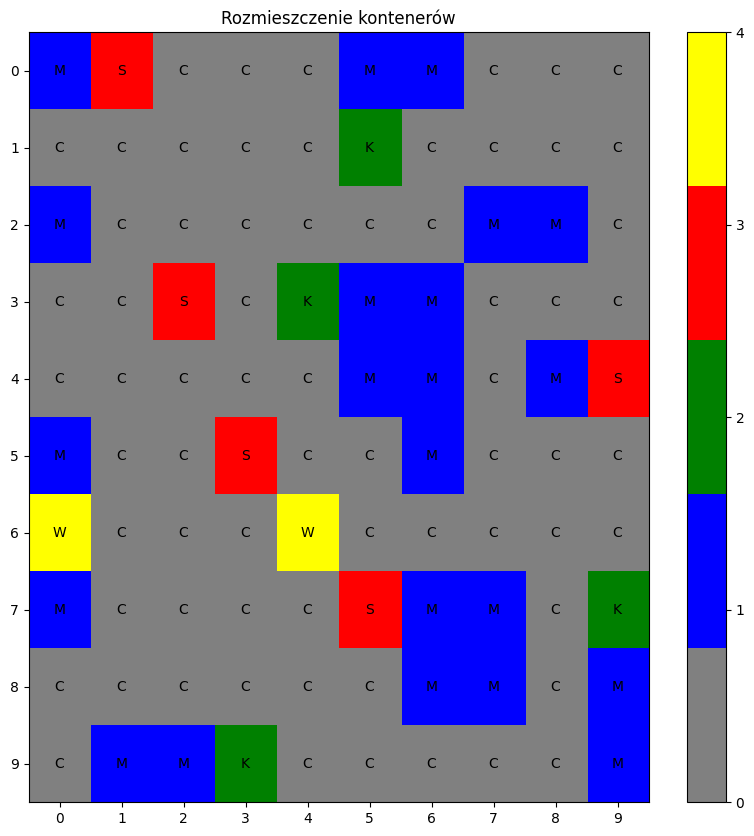

AttributeError: 'list' object has no attribute 'fitness'

In [37]:
def test_crossover_methods():
    crossover_configs = [
        (tools.cxOnePoint, {}),
        (tools.cxTwoPoint, {}),
        (tools.cxUniform, {"indpb": 0.1}),
        (tools.cxBlend, {"alpha": 0.5}),
        (tools.cxSimulatedBinary, {"eta": 0.5}),
        (tools.cxOrdered, {})
    ]
    crossover_names = []
    avg_crossover_results = []
    best_crossover_results = []

    for crossover, params in crossover_configs:
        toolbox.register("mate", crossover, **params)
        final_population = main()  # Załóżmy, że main() uruchamia algorytm genetyczny i zwraca populację

        avg_fitness = np.mean([ind.fitness.values[0] for ind in final_population])
        best_fitness = min([ind.fitness.values[0] for ind in final_population])

        avg_crossover_results.append(avg_fitness)
        best_crossover_results.append(best_fitness)
        crossover_names.append(crossover.__name__)

    # Wykres porównujący metody krzyżowania
    x = range(len(crossover_names))
    plt.figure(figsize=(10, 6))
    avg_color = 'lightsteelblue'
    best_color = 'thistle'
    plt.bar(x, avg_crossover_results, width=0.4, label='Średnie przystosowanie', align='center', color=avg_color)
    plt.bar(x, best_crossover_results, width=0.4, label='Najlepsze przystosowanie', align='edge', color=best_color)
    plt.xlabel('Metody krzyżowania')
    plt.ylabel('Wartość przystosowania')
    plt.xticks(x, crossover_names, rotation=45)
    plt.title('Porównanie metod krzyżowania')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Wywołanie funkcji testującej
test_crossover_methods()